In [1]:
import os
import pandas as pd
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
os.listdir('../input/')

['.DS_Store',
 'test.csv',
 'roberta-base',
 'merges.txt',
 'spiece.model',
 'vocab.txt',
 'train.csv',
 'vocab.json',
 'bert-base-uncased',
 'roberta-base-squad2',
 'sample_submission.csv']

In [122]:
trn_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')

trn_df['text'] = trn_df['text'].astype(str)
test_df['text'] = test_df['text'].astype(str)
trn_df['text_len'] = trn_df['text'].apply(lambda x : len(x.split()))
test_df['text_len'] = test_df['text'].apply(lambda x : len(x.split()))
trn_df['selected_text'] = trn_df['selected_text'].astype(str)
trn_df['selected_text_len'] = trn_df['selected_text'].apply(lambda x : len(x.split()))
trn_df['selected_rate'] = trn_df['selected_text_len'] / trn_df['text_len']

pos_df = trn_df[trn_df.sentiment == 'positive']
neg_df = trn_df[trn_df.sentiment == 'negative']
neu_df = trn_df[trn_df.sentiment == 'neutral']



In [123]:
print(f"train rows : {trn_df.shape[0]}")
print(f"test rows : {test_df.shape[0]}")
print("")
print(f"train mean and median sentence length : {trn_df['text_len'].mean()}, {trn_df['text_len'].median()}")
print(f"test mean sentence length : {test_df['text_len'].mean()}, {test_df['text_len'].median()}")
print("")
print(f"train mean and median sentence length : {trn_df['text_len'].mean()}, {trn_df['text_len'].median()}")
print(f"test mean sentence length : {test_df['text_len'].mean()}, {test_df['text_len'].median()}")

train rows : 27480
test rows : 3534

train mean and median sentence length : 12.90287481804949, 12.0
test mean sentence length : 12.763157894736842, 12.0

train mean and median sentence length : 12.90287481804949, 12.0
test mean sentence length : 12.763157894736842, 12.0


In [124]:
trn_df.groupby('sentiment')['selected_text_len'].mean()

sentiment
negative     3.957975
neutral     12.069533
positive     3.519343
Name: selected_text_len, dtype: float64

In [125]:
def check_if_same_by_length(df):
    sentiments = []
    lengths = []
    rates = []
    
    for sentiment in ['positive', 'negative', 'neutral']:
        for length in range(1,33):
            yes = 0
            no = 0
            for i, series in df[(df['sentiment'] == sentiment) & (df['text_len'] == length)].iterrows():
                if series['selected_text_len'] == series['text_len']:
                    yes+=1
                else:
                    no+=1
            sentiments.append(sentiment)
            lengths.append(length)
            rates.append(yes/(yes+no))

    return pd.DataFrame({'sentiments':sentiments, 'lengths':lengths, 'rates':rates})

df = check_if_same_by_length(trn_df)

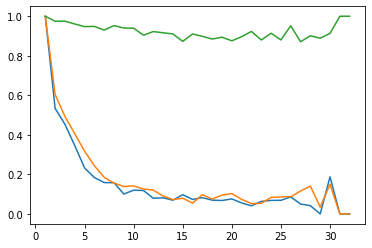

In [126]:
import matplotlib.pyplot as plt
for sentiment in ['positive', 'negative', 'neutral']:
    plt.plot(df[df['sentiments'] == sentiment]['lengths'], df[df['sentiments'] == sentiment]['rates'])

In [127]:
trn_df[(trn_df['text_len'] == 30) & (trn_df['sentiment'] == 'positive')]

,textID,text,selected_text,sentiment,text_len,selected_text_len,selected_rate
63,90a2cdb657,What better way to spoil mum than to let her k...,favorite,positive,30,1,0.033333
3201,d68d87da7b,well.. all my slacking off earned me a D and a...,earned me,positive,30,2,0.066667
4543,ef5c867533,aww i hope u find it soon i miss it. i cnt e...,aww i hope u find it soon i miss it.,positive,30,10,0.333333
4793,a18d8120be,"Recovering from my crazy family. I love them, ...","Recovering from my crazy family. I love them, ...",positive,30,30,1.000000
5370,a85eb567d6,checked out Green Day on demand & saw the new ...,"U were right, they did blow my mind I love u ...",positive,30,18,0.600000
6890,e9990baa94,"I TRIED TO PUT A IRON ON , ON MY BOOK BAG AND ...",BUZZ KEEP MAKING FUN OF ME,positive,30,6,0.200000
8385,c930716002,Happy Friday! Do u know how I can get a copy ...,Happy Friday!,positive,30,2,0.066667
13595,e5af32e35c,"I am going to work than, ill be home, and im g...",everyone have a wonderful day,positive,30,5,0.166667
13698,23e8533b42,It`s so awesome to know that there are people ...,It`s so awesome to know that there are people ...,positive,30,30,1.000000
14701,88840a2a93,thx for all the nice 'it`s going to be alright...,thx for all the nice,positive,30,5,0.166667


# Check HTTP

In [128]:
trn_df.loc[trn_df.text.str.contains('http://'), 'sentiment'].value_counts()

neutral     578
positive    409
negative    233
Name: sentiment, dtype: int64

In [129]:
trn_df.loc[trn_df.selected_text.str.contains('http://'), 'sentiment'].value_counts()

neutral     344
positive      3
negative      3
Name: sentiment, dtype: int64

In [130]:
test_df.loc[test_df.text.str.contains('http://'), 'sentiment'].value_counts()

neutral     83
positive    63
negative    28
Name: sentiment, dtype: int64

In [131]:
trn_df.iloc[17]['text']

'i`ve been sick for the past few days  and thus, my hair looks wierd.  if i didnt have a hat on it would look... http://tinyurl.com/mnf4kw'

In [132]:
trn_df.loc[(trn_df.text.str.contains('http://')) & ~(trn_df.selected_text.str.contains('http://'))]

,textID,text,selected_text,sentiment,text_len,selected_text_len,selected_rate
17,919fa93391,i`ve been sick for the past few days and thus...,sick,negative,25,1,0.040000
35,4f5267ad70,"Thats it, its the end. Tears for Fears vs Eric...","Thats it, its the end. Tears for Fears",neutral,14,8,0.571429
57,6086b1f016,will be back later. http://plurk.com/p/rp3k7,will be back later.,neutral,5,4,0.800000
64,98f25bc596,mannnn..... _ got an iphone!!! im jealous.... ...,jealous..,negative,8,1,0.125000
172,bc02870b7d,URL in previous post (to timer job) should be ...,messed,negative,18,1,0.055556
...,...,...,...,...,...,...,...
27373,b49385ebb7,"says Finally, Im home. http://plurk.com/p/rr121","says Finally, Im home.",neutral,5,4,0.800000
27383,f94af8cb85,This is a much better tool than some I have co...,This is a much better tool,positive,18,6,0.333333
27385,e149ebd3a1,#vwll2009 Would one of the VWLLers want to add...,ch appreciat,positive,19,2,0.105263
27462,a38bf809b0,LIKE DREW SAID 'GIVE TC A CHANCE' WE WILL MIS...,MISS,negative,20,1,0.050000


# Check distribution

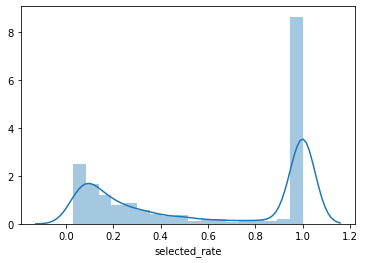

In [133]:
import seaborn as sns
fig = plt.figure()
sns.distplot(trn_df['selected_rate'])

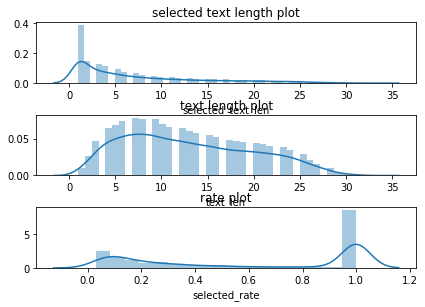

In [134]:
fig, axes = plt.subplots(3,1)
fig.tight_layout()

ax0 = sns.distplot(trn_df['selected_text_len'], ax=axes[0])
_ = ax0.set_title('selected text length plot')

ax1 = sns.distplot(trn_df['text_len'], ax=axes[1])
_ = ax1.set_title('text length plot')

ax2 = sns.distplot(trn_df['selected_rate'], ax=axes[2])
_ = ax2.set_title('rate plot')

# Find rule

In [147]:
WORD_LEN = 2
print(f'POSITVIE WORD LEN < {WORD_LEN} rate: ', pos_df.loc[trn_df.text_len < WORD_LEN, 'selected_rate'].mean())
print(f'POSITVIE WORD LEN < {WORD_LEN} rate: ', pos_df.loc[trn_df.text_len < WORD_LEN, 'selected_rate'].mean())

print(f'NEGATIVE WORD LEN < {WORD_LEN} count: ', len(neg_df.loc[trn_df.text_len < WORD_LEN, 'selected_rate']))
print(f'POSITVIE WORD LEN < {WORD_LEN} count: ', len(pos_df.loc[trn_df.text_len < WORD_LEN, 'selected_rate']))

POSITVIE WORD LEN < 2 rate:  1.0
POSITVIE WORD LEN < 2 rate:  1.0
NEGATIVE WORD LEN < 2 count:  17
POSITVIE WORD LEN < 2 count:  46


In [144]:
WORD_LEN = 3
print(f'POSITVIE WORD LEN < {WORD_LEN} rate: ', pos_df.loc[trn_df.text_len < WORD_LEN, 'selected_rate'].mean())
print(f'POSITVIE WORD LEN < {WORD_LEN} rate: ', pos_df.loc[trn_df.text_len < WORD_LEN, 'selected_rate'].mean())

print(f'NEGATIVE WORD LEN < {WORD_LEN} count: ', len(neg_df.loc[trn_df.text_len < WORD_LEN, 'selected_rate']))
print(f'POSITVIE WORD LEN < {WORD_LEN} count: ', len(pos_df.loc[trn_df.text_len < WORD_LEN, 'selected_rate']))

POSITVIE WORD LEN < 3 rate:  0.8188405797101449
POSITVIE WORD LEN < 3 rate:  0.8188405797101449
NEGATIVE WORD LEN < 3 count:  108
POSITVIE WORD LEN < 3 count:  207


In [146]:
WORD_LEN = 6
print(f'POSITVIE WORD LEN < {WORD_LEN} : ', pos_df.loc[trn_df.text_len < WORD_LEN, 'selected_rate'].mean())
print(f'NEGATIVE WORD LEN < {WORD_LEN} : ',neg_df.loc[trn_df.text_len < WORD_LEN, 'selected_rate'].mean())

print(f'NEGATIVE WORD LEN < {WORD_LEN} count: ', len(neg_df.loc[trn_df.text_len < WORD_LEN, 'selected_rate']))
print(f'POSITVIE WORD LEN < {WORD_LEN} count: ', len(pos_df.loc[trn_df.text_len < WORD_LEN, 'selected_rate']))

POSITVIE WORD LEN < 6 :  0.6113196814562003
NEGATIVE WORD LEN < 6 :  0.6334681496461072
NEGATIVE WORD LEN < 6 count:  989
POSITVIE WORD LEN < 6 count:  1172


In [85]:
trn_df.loc[trn_df.text_len < 4, 'selected_rate'].mean()

0.8722388059701492